In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:

import tensorflow as tf
print("tensorflow version :{}".format(tf.__version__))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tensorflow version :2.9.2
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16264974810100132779
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4625746200419241950
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
#### physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight

In [ ]:

from keras.layers import Conv1D, Dense, Dropout, GlobalMaxPool1D, MaxPool1D
from keras.layers import TimeDistributed, LSTM, Bidirectional, Input, concatenate,RepeatVector
from keras import regularizers
# from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model, Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.regularizers import l1,l2


In [ ]:
data_path = "/content/drive/MyDrive/CAV/data/Bias attack/0_1_dur_10/"

In [ ]:
sensor1_data = pd.read_csv(data_path + "Sensor1_values_bias_0_1_dur_10_dep.csv", index_col= 'Unnamed: 0')
sensor1_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
len(sensor1_data)

29800

In [ ]:
sensor1_label = pd.read_csv(data_path + "Ground_truth_bias_0_1_dur_10_sensor1_dep.csv", names=['Class'])
sensor1_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
len(sensor1_label)

29800

In [ ]:
sensor2_data = pd.read_csv(data_path + "Sensor2_values_bias_0_1_dur_10_dep.csv", index_col = "Unnamed: 0")
sensor2_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor2_label = pd.read_csv(data_path + "Ground_truth_bias_0_1_dur_10_sensor2_dep.csv",names=['Class'])
sensor2_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor3_data = pd.read_csv(data_path + "Sensor3_values_bias_0_1_dur_10_dep.csv", index_col = "Unnamed: 0")
sensor3_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor3_label = pd.read_csv(data_path + "Ground_truth_bias_0_1_dur_10_sensor3_dep.csv", names=['Class'])
sensor3_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor1_data['std_speed_5'] = sensor1_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor1_data['std_acc_5'] = sensor1_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor1_data['std_GPS_5'] = sensor1_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor1_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

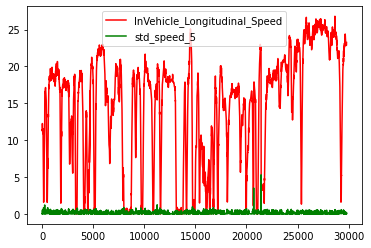

In [ ]:
sensor1_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot(color=['red', 'green'] )

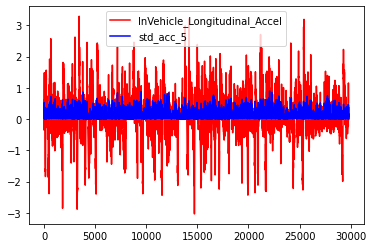

In [ ]:
sensor1_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot(color=['red', 'blue'] )

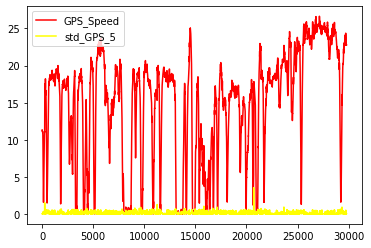

In [ ]:
sensor1_data[['GPS_Speed','std_GPS_5']].plot(color=['red', 'yellow'] )

In [ ]:
sensor2_data['std_speed_5'] = sensor2_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor2_data['std_acc_5'] = sensor2_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor2_data['std_GPS_5'] = sensor2_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor2_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

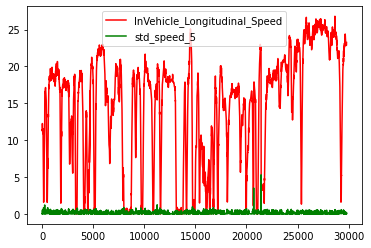

In [ ]:
sensor2_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot(color=['red', 'green'] )

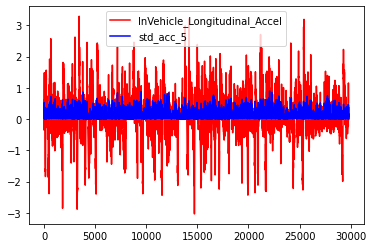

In [ ]:
sensor2_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot(color=['red', 'blue'] )

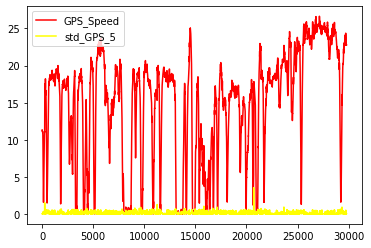

In [ ]:
sensor2_data[['GPS_Speed','std_GPS_5']].plot(color=['red', 'yellow'] )

In [ ]:
sensor3_data['std_speed_5'] = sensor3_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor3_data['std_acc_5'] = sensor3_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor3_data['std_GPS_5'] = sensor3_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor3_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

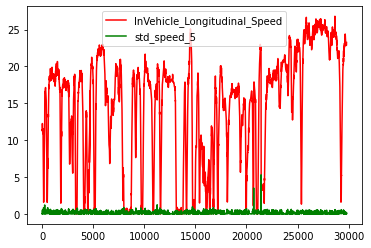

In [ ]:
sensor3_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot(color=['red', 'green'] )

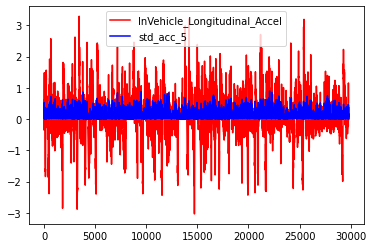

In [ ]:
sensor3_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot(color=['red', 'blue'] )

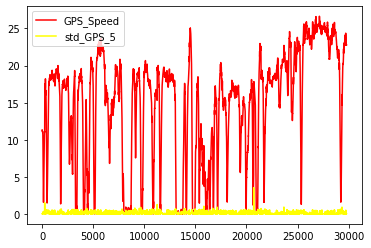

In [ ]:
sensor3_data[['GPS_Speed','std_GPS_5']].plot(color=['red', 'yellow'] )

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor1_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor1_data_normal = scaler.transform(sensor1_data[['std_speed_5','std_GPS_5','std_acc_5']]) 
sensor1_data_normal[:5]

array([[-0.62569396, -0.49156122,  0.36180722],
       [-0.62147556, -0.5355285 ,  0.28228616],
       [-0.61970526, -0.56320157,  0.19936424],
       [-0.63905042, -0.67802078,  0.25144001],
       [-0.64506256, -0.67491269, -0.77594496]])

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor2_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor2_data_normal = scaler.transform(sensor2_data[['std_speed_5','std_GPS_5','std_acc_5']]) 
sensor2_data_normal[:5]

array([[-0.62569396, -0.49156122,  0.36180722],
       [-0.62147556, -0.5355285 ,  0.28228616],
       [-0.61970526, -0.56320157,  0.19936424],
       [-0.63905042, -0.67802078,  0.25144001],
       [-0.64506256, -0.67491269, -0.77594496]])

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor3_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor3_data_normal = scaler.transform(sensor3_data[['std_speed_5','std_GPS_5','std_acc_5']]) 
sensor3_data_normal[:5]

array([[-0.62569396, -0.49156122,  0.36180722],
       [-0.62147556, -0.5355285 ,  0.28228616],
       [-0.61970526, -0.56320157,  0.19936424],
       [-0.63905042, -0.67802078,  0.25144001],
       [-0.64506256, -0.67491269, -0.77594496]])

In [ ]:
window_size = 10

# create windows with overlap
def convertToFrames(X_data,y_data, step):
    X, Y =[], []    
    for i in range(len(X_data)-step):
        y_or = 0
        d=i+step  
        X.append(X_data[i:d,])
        for y in y_data.iloc[i:d].values:
           y_or = y_or or y
        
        Y.append(y_or)
    return np.array(X), np.array(Y)

In [ ]:
X_sensor1, y_sensor1 = convertToFrames(sensor1_data_normal, sensor1_label, window_size)
X_sensor1.shape, y_sensor1.shape
# print(X_sensor1[0])
# print(X_sensor1[1])

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor2, y_sensor2 = convertToFrames(sensor2_data_normal, sensor2_label, window_size)
X_sensor2.shape, y_sensor2.shape

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor3, y_sensor3 = convertToFrames(sensor3_data_normal, sensor3_label, window_size)
X_sensor3.shape, y_sensor3.shape

((29790, 10, 3), (29790, 1))

In [ ]:
y_sensor1 = to_categorical(y_sensor1, num_classes= 2, dtype='float32')
X_train_sensor1,X_test_sensor1, y_train_sensor1, y_test_sensor1 = train_test_split(X_sensor1,y_sensor1,random_state = 1400, test_size= 0.15)
y_train_sensor1, y_test_sensor1 = y_train_sensor1.squeeze(), y_test_sensor1.squeeze()
X_train_sensor1.shape, X_test_sensor1.shape,y_train_sensor1.shape, y_test_sensor1.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:
y_sensor2 = to_categorical(y_sensor2, num_classes= 2, dtype='float32')
X_train_sensor2,X_test_sensor2, y_train_sensor2, y_test_sensor2 = train_test_split(X_sensor2,y_sensor2,random_state = 1400, test_size= 0.15)
y_train_sensor2, y_test_sensor2 = y_train_sensor2.squeeze(), y_test_sensor2.squeeze()
X_train_sensor2.shape, X_test_sensor2.shape,y_train_sensor2.shape, y_test_sensor2.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:
y_sensor3 = to_categorical(y_sensor3, num_classes= 2, dtype='float32')
X_train_sensor3,X_test_sensor3, y_train_sensor3, y_test_sensor3 = train_test_split(X_sensor3,y_sensor3,random_state = 1400, test_size= 0.15)
y_train_sensor3, y_test_sensor3 = y_train_sensor3.squeeze(), y_test_sensor3.squeeze()
X_train_sensor3.shape, X_test_sensor3.shape,y_train_sensor3.shape, y_test_sensor3.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:

def creatModel():
  
    model = Sequential()
    model.add(Conv1D(kernel_size=3, filters= 40, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add( Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(GlobalMaxPool1D())
    model.add(RepeatVector(X_train_sensor1.shape[1]))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(rate=0.2))
    model.add((Dense(32)))
    model.add((Dense(16)))
    model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2()))
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

    return model


In [ ]:
import time

class TimeHistory(Callback):
  
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        epoch_time = time.time() - self.epoch_time_start
        logs['epoch_time'] = epoch_time


In [ ]:
model_path = '/content/drive/MyDrive/CAV/data/Bias attack/0_1_dur_10/Models/Models28-1/'

class Model_save(Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.save(model_path + "CNN-LSTM-autoEncoder-Bias-0_1_10-CAV-perEpoch_{}.h5".format(sensor))
    

In [ ]:
def setCallbacks(sensor):

  best_model_path = model_path + 'Best_CNN-LSTM-autoEncoder-Bias-0_1_10-CAV_{}.h5'.format(sensor)
  checkpoint = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, mode='min')

  history_cb = tf.keras.callbacks.CSVLogger(model_path + 'historyLOG_Bias-0_1_10_{}.csv'.format(sensor), separator=",", append=True)

  model_save = Model_save()

  Estop = EarlyStopping(monitor='val_accuracy', patience= 100)
  
  return model_save, checkpoint, history_cb, Estop

In [ ]:
sensor = "sensor1"
time_callback = TimeHistory()
model_sensor1 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor1")
history_sensor1 = model_sensor1.fit(X_train_sensor1, y_train_sensor1,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#


Epoch 1/500
179/179 [==============================] - 24s 17ms/step - loss: 0.3131 - accuracy: 0.8884 - val_loss: 0.2255 - val_accuracy: 0.9360 - epoch_time: 23.5620
Epoch 2/500
179/179 [==============================] - 2s 12ms/step - loss: 0.1884 - accuracy: 0.9434 - val_loss: 0.1566 - val_accuracy: 0.9582 - epoch_time: 1.9243
Epoch 3/500
179/179 [==============================] - 3s 16ms/step - loss: 0.1587 - accuracy: 0.9526 - val_loss: 0.1425 - val_accuracy: 0.9566 - epoch_time: 2.5935
Epoch 4/500
179/179 [==============================] - 2s 11ms/step - loss: 0.1446 - accuracy: 0.9555 - val_loss: 0.1371 - val_accuracy: 0.9617 - epoch_time: 1.8788
Epoch 5/500
179/179 [==============================] - 2s 11ms/step - loss: 0.1280 - accuracy: 0.9602 - val_loss: 0.1104 - val_accuracy: 0.9637 - epoch_time: 1.8319
Epoch 6/500
179/179 [==============================] - 2s 11ms/step - loss: 0.1211 - accuracy: 0.9615 - val_loss: 0.1118 - val_accuracy: 0.9645 - epoch_time: 1.9001
Epoch 7/

In [ ]:
print(model_sensor1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 40)            400       
                                                                 
 dropout (Dropout)           (None, 10, 40)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 60)            7260      
                                                                 
 dropout_1 (Dropout)         (None, 10, 60)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 60)            10860     
                                                                 
 dropout_2 (Dropout)         (None, 10, 60)            0         
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0

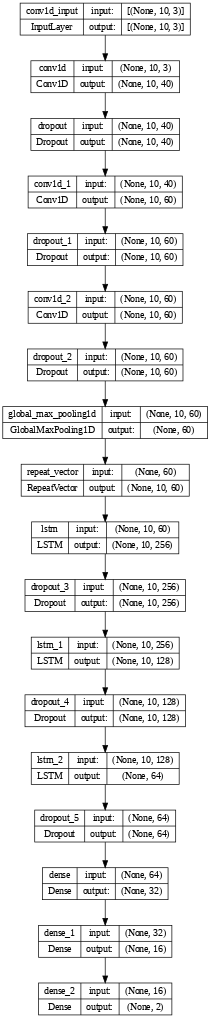

In [ ]:
plot_model(model= model_sensor1, show_shapes= True, dpi=50)

In [ ]:
sensor = "sensor2"
time_callback = TimeHistory()
model_sensor2 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor2")
history_sensor2 = model_sensor2.fit(X_train_sensor2, y_train_sensor2,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#

Epoch 1/500
179/179 [==============================] - 8s 16ms/step - loss: 0.3357 - accuracy: 0.8821 - val_loss: 0.2429 - val_accuracy: 0.9222 - epoch_time: 7.5573
Epoch 2/500
179/179 [==============================] - 2s 13ms/step - loss: 0.2226 - accuracy: 0.9307 - val_loss: 0.1978 - val_accuracy: 0.9388 - epoch_time: 2.0499
Epoch 3/500
179/179 [==============================] - 3s 15ms/step - loss: 0.1874 - accuracy: 0.9423 - val_loss: 0.2018 - val_accuracy: 0.9380 - epoch_time: 2.5219
Epoch 4/500
179/179 [==============================] - 2s 12ms/step - loss: 0.1746 - accuracy: 0.9463 - val_loss: 0.1863 - val_accuracy: 0.9447 - epoch_time: 1.8815
Epoch 5/500
179/179 [==============================] - 2s 11ms/step - loss: 0.1631 - accuracy: 0.9500 - val_loss: 0.1682 - val_accuracy: 0.9467 - epoch_time: 1.8174
Epoch 6/500
179/179 [==============================] - 2s 11ms/step - loss: 0.1548 - accuracy: 0.9524 - val_loss: 0.1613 - val_accuracy: 0.9518 - epoch_time: 1.8371
Epoch 7/50

In [ ]:
sensor = "sensor3"
time_callback = TimeHistory()
model_sensor3 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor3")
history_sensor3 = model_sensor3.fit(X_train_sensor3, y_train_sensor3,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#

Epoch 1/500
179/179 [==============================] - 8s 16ms/step - loss: 0.4425 - accuracy: 0.8254 - val_loss: 0.3801 - val_accuracy: 0.8551 - epoch_time: 7.3680
Epoch 2/500
179/179 [==============================] - 2s 11ms/step - loss: 0.3759 - accuracy: 0.8573 - val_loss: 0.3581 - val_accuracy: 0.8642 - epoch_time: 1.8671
Epoch 3/500
179/179 [==============================] - 3s 14ms/step - loss: 0.3576 - accuracy: 0.8618 - val_loss: 0.3560 - val_accuracy: 0.8701 - epoch_time: 2.3299
Epoch 4/500
179/179 [==============================] - 2s 14ms/step - loss: 0.3480 - accuracy: 0.8669 - val_loss: 0.3473 - val_accuracy: 0.8658 - epoch_time: 2.2809
Epoch 5/500
179/179 [==============================] - 2s 11ms/step - loss: 0.3400 - accuracy: 0.8691 - val_loss: 0.3378 - val_accuracy: 0.8701 - epoch_time: 1.8286
Epoch 6/500
179/179 [==============================] - 2s 11ms/step - loss: 0.3319 - accuracy: 0.8728 - val_loss: 0.3413 - val_accuracy: 0.8697 - epoch_time: 1.8275
Epoch 7/50

In [ ]:
#plot history of model_sensor1
history_sensor1 = pd.read_csv(model_path +"historyLOG_Bias-0_1_10_sensor1.csv", index_col='epoch')
history_sensor1.reset_index(drop= True, inplace= True)
history_sensor1.head()
print('Average Exe_time for sensor1: {} sec.'.format(round(np.mean(history_sensor1['epoch_time'].values),3)))


Average Exe_time for sensor1: 2.168 sec.


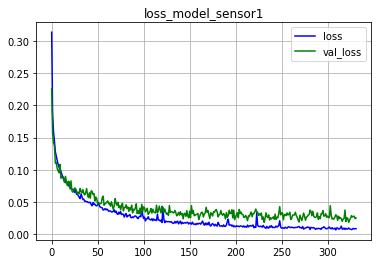

In [ ]:
plt.plot( history_sensor1['loss'], 'b',label = 'loss')
plt.plot( history_sensor1['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor1')
plt.show()

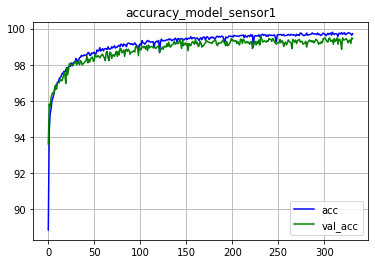

In [ ]:
plt.plot(history_sensor1['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor1['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor1')
plt.show()

In [ ]:
history_sensor2 = pd.read_csv(model_path +"historyLOG_Bias-0_1_10_sensor2.csv", index_col='epoch')
history_sensor2.reset_index(drop= True, inplace= True)
history_sensor2.head()
print('Average Exe_time for sensor2: {} sec.'.format(round(np.mean(history_sensor2['epoch_time'].values),3)))


Average Exe_time for sensor2: 2.142 sec.


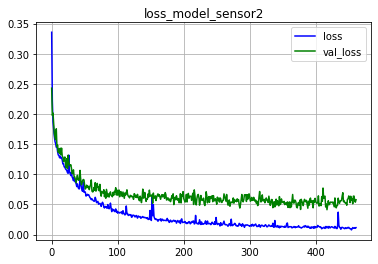

In [ ]:
plt.plot( history_sensor2['loss'], 'b',label = 'loss')
plt.plot( history_sensor2['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor2')
plt.show()

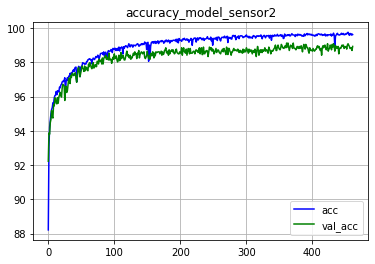

In [ ]:
plt.plot(history_sensor2['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor2['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor2')
plt.show()

In [ ]:
history_sensor3 = pd.read_csv(model_path +"historyLOG_Bias-0_1_10_sensor3.csv", index_col='epoch')
history_sensor3.reset_index(drop= True, inplace= True)
history_sensor3.head()
print('Average Exe_time for sensor3: {} sec.'.format(round(np.mean(history_sensor3['epoch_time'].values),3)))


Average Exe_time for sensor3: 2.139 sec.


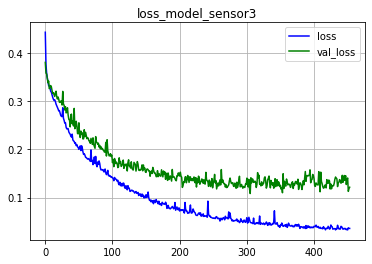

In [ ]:
plt.plot( history_sensor3['loss'], 'b',label = 'loss')
plt.plot( history_sensor3['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor3')
plt.show()

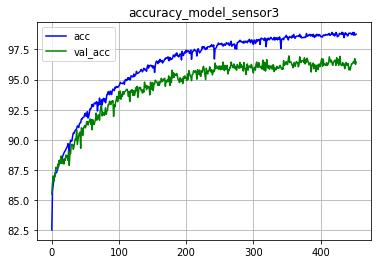

In [ ]:
plt.plot(history_sensor3['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor3['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor3')
plt.show()

In [ ]:
#last model_sensor1 evaluation
test_loss, test_acc = model_sensor1.evaluate( X_test_sensor1, y_test_sensor1, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 5ms/step - loss: 0.0315 - accuracy: 0.9937
test accuracy :99.4% 
 test loss :0.0315


In [ ]:
#last model_sensor2 evaluation
test_loss, test_acc = model_sensor2.evaluate( X_test_sensor2, y_test_sensor2, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 4ms/step - loss: 0.0580 - accuracy: 0.9877
test accuracy :98.8% 
 test loss :0.058


In [ ]:
#last model_sensor3 evaluation
test_loss, test_acc = model_sensor3.evaluate( X_test_sensor3, y_test_sensor3, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 5ms/step - loss: 0.1026 - accuracy: 0.9673
test accuracy :96.7% 
 test loss :0.103


In [ ]:
y_pred_sensor1 = model_sensor1.predict( X_test_sensor1, verbose= 1)
y_pred_sensor2 = model_sensor2.predict( X_test_sensor2, verbose= 1)
y_pred_sensor3 = model_sensor3.predict( X_test_sensor3, verbose= 1)

140/140 [==============================] - 1s 4ms/step


In [ ]:
y_pred_sensor1 = [np.argmax(i) for i in y_pred_sensor1]
y_pred_sensor2 = [np.argmax(i) for i in y_pred_sensor2]
y_pred_sensor3 = [np.argmax(i) for i in y_pred_sensor3]

In [ ]:
y_pred_total = []
for i in range(len(y_pred_sensor1)):
  y_pred_total.append( y_pred_sensor1[i] or y_pred_sensor2[i] or y_pred_sensor3[i])

In [ ]:
assert(len(y_pred_total) == len(y_pred_sensor1))

In [ ]:
y_test_sensor1 = [np.argmax(i) for i in y_test_sensor1]
y_test_sensor2 = [np.argmax(i) for i in y_test_sensor2]
y_test_sensor3 = [np.argmax(i) for i in y_test_sensor3]

In [ ]:
y_test_total = []
for i in range(len(y_test_sensor1)):
  y_test_total.append(y_test_sensor1[i] or y_test_sensor2[i] or y_test_sensor3[i])

In [ ]:
print("Sensor 1 performanace:")
recall = recall_score(y_test_sensor1, y_pred_sensor1, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor1, y_pred_sensor1, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor1, y_pred_sensor1, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor1, y_pred_sensor1)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 1 performanace:
recall score : 99.37%

precision score: 99.37%

F1 score: 99.37%

accuracy score: 99.37%



In [ ]:
print("Sensor 2 performanace:")
recall = recall_score(y_test_sensor2, y_pred_sensor2, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor2, y_pred_sensor2, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor2, y_pred_sensor2, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor2, y_pred_sensor2)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 2 performanace:
recall score : 98.77%

precision score: 98.77%

F1 score: 98.77%

accuracy score: 98.77%



In [ ]:
print("Sensor 3 performanace:")
recall = recall_score(y_test_sensor3, y_pred_sensor3, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor3, y_pred_sensor3, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor3, y_pred_sensor3, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor3, y_pred_sensor3)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 3 performanace:
recall score : 96.73%

precision score: 96.73%

F1 score: 96.73%

accuracy score: 96.73%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 96.98%

precision score: 96.98%

F1 score: 96.98%

accuracy score: 96.98%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 97.18%

precision score: 96.38%

F1 score: 96.75%

accuracy score: 96.98%



In [ ]:
conf = confusion_matrix(y_test_total, y_pred_total, labels=[1,0])
conf_df = pd.DataFrame(conf, columns= [1,0], index= [1,0])
conf_df

,1,0
1,2761,101
0,34,1573
